#Question 1: What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.

**Ans:-** Deep Learning is a subset of machine learning that uses artificial neural networks with many layers to automatically learn patterns and representations from large amounts of data. It is especially powerful for tasks like image recognition, speech processing, and natural language understanding.

Deep learning evolved from early artificial neural networks developed in the mid-20th century. Progress was slow due to limited data and computing power. In the 2010s, the availability of large datasets, powerful GPUs, and improved training algorithms (such as backpropagation and better activation functions) enabled the successful training of deep neural networks, leading to major advances in vision, speech, and language tasks.


#question 2: Question 2: Explain the basic architecture and functioning of a Perceptron. What are its limitations?
**Ans:-** Perceptron: Basic Architecture and Functioning

Architecture:
A perceptron is the simplest form of an artificial neural network and consists of:

Input layer: Takes input features

Weights: Each input has an associated weight

Bias: A constant term added to the weighted sum

Summation unit: Computes the weighted sum
Activation function: Typically a step (threshold) function that produces a binary output (0 or 1)

#Question 3: Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.
**Ans:-** The activation function decides whether a neuron should be “activated” (i.e., pass its signal forward) based on the weighted sum of its inputs.

Sigmoid :- Good for binary outputs, poor for deep hidden layers

Tanh :-  Better than sigmoid but largely replaced by ReLU

ReLU :-  Most popular for hidden layers due to simplicity and performance

#Question 4: What is the difference between Loss function and Cost function in neural networks? Provide examples
**Ans:-** In neural networks, a loss function calculates the error for a single training example, indicating how far the predicted output is from the true value for that specific data point. For example, the loss for one sample using Mean Squared Error is (y-y^)2, and in binary classification, Binary Cross-Entropy measures the error for one predicted label.

In contrast, a cost function represents the average or total loss over the entire training dataset or a batch, giving an overall measure of how well the neural network is performing. For instance, Mean Squared Error cost is the average of squared errors across all training samples, and Cross-Entropy cost averages the individual cross-entropy losses.

#Question 5: What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop.
**Ans:-** Optimizers play a crucial role in neural networks by updating the model’s weights and biases in a way that minimizes the loss or cost function.

Gradient Descent updates parameters by moving them in the direction of the negative gradient of the cost function using a fixed learning rate.

RMSprop improves upon basic gradient descent by adapting the learning rate for each parameter individually.

Adam combines the advantages of RMSprop and momentum-based gradient descent. It maintains moving averages of both the gradients (first moment) and squared gradients (second moment), allowing for adaptive learning rates and faster, more stable convergence.




In [ ]:
import numpy as np

#Question 6:
'''
Write a Python program to implement a single-layer perceptron from scratch using NumPy to solve the logical AND gate.
'''

X = np.array(
    [[0, 0],
     [0, 1],
     [1, 0],
     [1, 1]]
, dtype=float)
y = np.array([0, 0, 0, 1], dtype=float)
class Perceptron:
    def __init__(self, n_features, learning_rate=0.1, n_epochs=20):
        self.lr = learning_rate
        self.n_epochs = n_epochs
        self.w = np.zeros(n_features + 1)

    def _add_bias(self, X):
        bias = np.ones((X.shape[0], 1))
        return np.hstack([bias, X])

    def _activation(self, z):
        return np.where(z >= 0, 1.0, 0.0)

    def fit(self, X, y):
        Xb = self._add_bias(X)
        for epoch in range(self.n_epochs):
            for xi, target in zip(Xb, y):
                z = np.dot(xi, self.w)
                y_pred = self._activation(z)
                error = target - y_pred
                self.w += self.lr * error * xi
    def predict(self, X):
        Xb = self._add_bias(X)
        z = Xb @ self.w
        return self._activation(z)
perceptron = Perceptron(n_features=2, learning_rate=0.1, n_epochs=20)
perceptron.fit(X, y)

print("Learned weights (bias, w1, w2):", perceptron.w)
for x_i, target in zip(X, y):
    pred = perceptron.predict(x_i.reshape(1, -1))[0]
    print(f"Input: {x_i}  AND -> predicted: {int(pred)}  expected: {int(target)}")

Learned weights (bias, w1, w2): [-0.2  0.2  0.1]
Input: [0. 0.]  AND -> predicted: 0  expected: 0
Input: [0. 1.]  AND -> predicted: 0  expected: 0
Input: [1. 0.]  AND -> predicted: 0  expected: 0
Input: [1. 1.]  AND -> predicted: 1  expected: 1


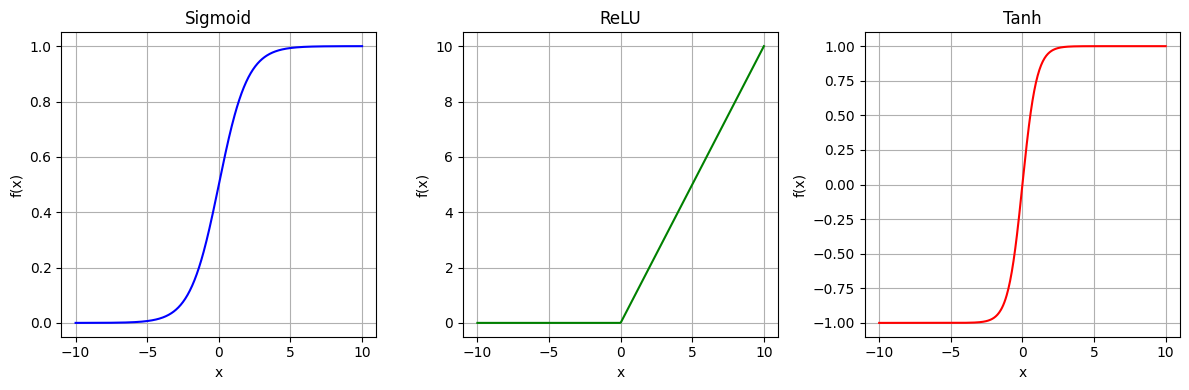

In [ ]:
#Question 7:
'''
Implement and visualize Sigmoid, ReLU, and Tanh activation functions using Matplotlib.
'''

import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1 / (1 + np.exp(-x))          # range: (0, 1)

def relu(x):
    return np.maximum(0, x)              # range: [0, +∞)

def tanh(x):
    return np.tanh(x)                    # range: (-1, 1)
x = np.linspace(-10, 10, 500)

y_sigmoid = sigmoid(x)
y_relu    = relu(x)
y_tanh    = tanh(x)
plt.figure(figsize=(12, 4))

# Sigmoid
plt.subplot(1, 3, 1)
plt.plot(x, y_sigmoid, color='blue')
plt.title('Sigmoid')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

# ReLU
plt.subplot(1, 3, 2)
plt.plot(x, y_relu, color='green')
plt.title('ReLU')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

# Tanh
plt.subplot(1, 3, 3)
plt.plot(x, y_tanh, color='red')
plt.title('Tanh')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
#Question 8:
'''
Use Keras to build and train a simple multilayer neural network on the
MNIST digits dataset. Print the training accuracy.
'''
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0
x_test  = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0
model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
history = model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=128,
    verbose=1,
    validation_data=(x_test, y_test))

# final training accuracy
final_train_acc = history.history["accuracy"][-1]
print(f"Final training accuracy: {final_train_acc:.4f}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8265 - loss: 0.6082 - val_accuracy: 0.9501 - val_loss: 0.1649
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9540 - loss: 0.1510 - val_accuracy: 0.9651 - val_loss: 0.1162
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9704 - loss: 0.1023 - val_accuracy: 0.9693 - val_loss: 0.1012
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9777 - loss: 0.0736 - val_accuracy: 0.9710 - val_loss: 0.0917
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9827 - loss: 0.0593 - val_accuracy: 0.9692 - val_loss: 0.0938
Final training accuracy: 0.9825


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7603 - loss: 0.6810 - val_accuracy: 0.8490 - val_loss: 0.4217
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8647 - loss: 0.3761 - val_accuracy: 0.8502 - val_loss: 0.4041
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8812 - loss: 0.3250 - val_accuracy: 0.8664 - val_loss: 0.3649
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8854 - loss: 0.3027 - val_accuracy: 0.8744 - val_loss: 0.3507
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8933 - loss: 0.2872 - val_accuracy: 0.8676 - val_loss: 0.3654
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8983 - loss: 0.2715 - val_accuracy: 0.8803 - val_loss: 0.3409
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s

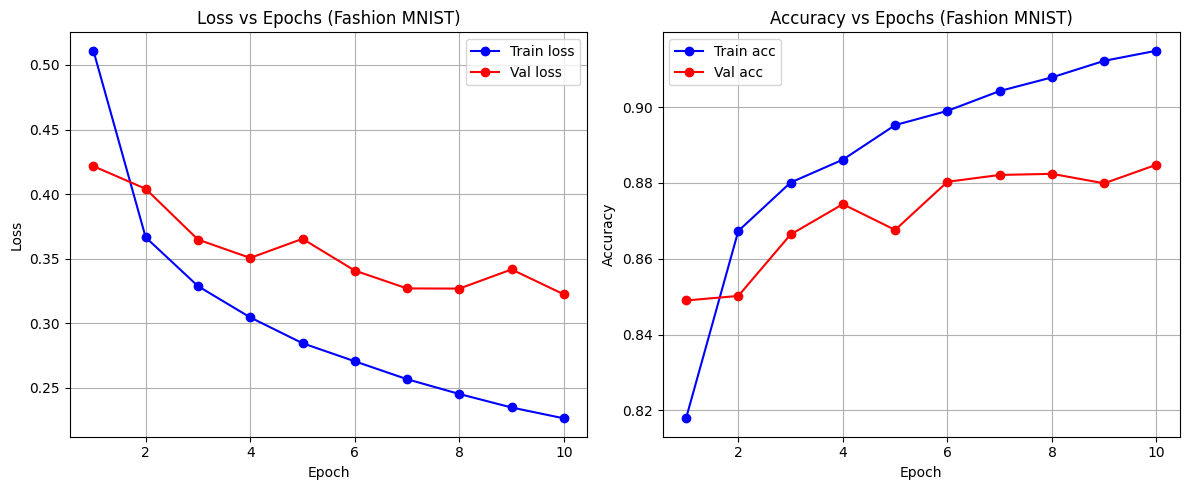

In [ ]:
#Question 9:
'''
Visualize the loss and accuracy curves for a neural network model trained on the Fashion MNIST dataset.
Interpret the training behavior.
'''

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0
x_train = x_train.reshape(-1, 28 * 28)
x_test  = x_test.reshape(-1, 28 * 28)

model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test, y_test),
    verbose=1)


epochs = range(1, len(history.history["loss"]) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history["loss"], "b-o", label="Train loss")
plt.plot(epochs, history.history["val_loss"], "r-o", label="Val loss")
plt.title("Loss vs Epochs (Fashion MNIST)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history["accuracy"], "b-o", label="Train acc")
plt.plot(epochs, history.history["val_accuracy"], "r-o", label="Val acc")
plt.title("Accuracy vs Epochs (Fashion MNIST)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#Question 10:
You are working on a project for a bank that wants to automatically detect
fraudulent transactions. The dataset is large, imbalanced, and contains structured
features like transaction amount, merchant ID, and customer location. The goal is to
classify each transaction as fraudulent or legitimate.
Explain your real-time data science workflow:

● How would you design a deep learning model (perceptron or multilayer NN)?

● Which activation function and loss function would you use, and why?

● How would you train and evaluate the model, considering class imbalance?

● Which optimizer would be suitable, and how would you prevent overfitting?

#Ans:-

1. To detect fraudulent transactions in a large, imbalanced banking dataset, I would design a multilayer neural network (MLP) rather than a single perceptron, because fraud patterns are complex and non-linear. The input layer would take structured features such as transaction amount, merchant ID (encoded), time, and customer location. One or more hidden layers would learn interactions between these features, and the output layer would produce a single value indicating whether a transaction is fraudulent or legitimate.

2. For activation functions, I would use ReLU in the hidden layers because it is computationally efficient and helps avoid the vanishing gradient problem in deep networks. In the output layer, I would use a Sigmoid activation function since this is a binary classification problem and sigmoid outputs a probability between 0 and 1. The loss function would be Binary Cross-Entropy, as it is well-suited for binary classification and penalizes confident wrong predictions strongly, which is important in fraud detection.

3. To train and evaluate the model, I would address class imbalance because fraudulent transactions are rare compared to legitimate ones. Techniques such as class weighting, oversampling the minority class (e.g., SMOTE), or undersampling the majority class would be used. For evaluation, accuracy alone is not reliable, so I would focus on metrics like precision, recall, F1-score, and ROC-AUC, with special emphasis on recall, since missing a fraud is costly. The data would be split into training, validation, and test sets, ensuring the imbalance ratio is preserved.

4. For optimization, I would choose the Adam optimizer because it adapts learning rates automatically, converges faster, and works well with large and noisy datasets typical in real-time banking systems. To prevent overfitting, I would use techniques such as dropout layers, L2 regularization, early stopping, and proper feature scaling. Together, this workflow ensures an efficient, accurate, and robust real-time fraud detection system suitable for banking applications.


